In [25]:
import pickle

# Open the pickle file in binary read mode
with open('system_data_files/system_data_arma_5k.pik', 'rb') as file:
    data = pickle.load(file)
wfm = data['wfm_data']

In [27]:
# Now 'data' holds your deserialized Python object
print(data)

{'wfm_data': array([[-3.75500072e-05,  2.25794858e-04, -3.65143267e-04, ...,
         5.63357198e-04, -1.11514256e-04,  6.88724095e-04],
       [ 1.98877756e-04,  1.06231193e-03,  2.72853677e-04, ...,
         1.11892392e-04,  2.21465380e-04,  4.73381958e-04],
       [-1.18108230e-04,  3.32333285e-05,  1.57541586e-04, ...,
         7.63315517e-05, -1.37252921e-04,  3.77920197e-04],
       ...,
       [-2.93192487e-04, -3.89621524e-04, -1.53403532e-04, ...,
        -2.19547676e-04, -5.06079145e-04, -4.86916065e-04],
       [-1.15655792e-04,  1.54154439e-04, -3.06059803e-04, ...,
         1.17883658e-05, -1.34816765e-04,  4.40589076e-05],
       [-3.28815386e-04, -3.94397786e-04, -2.77237622e-04, ...,
         2.19065894e-04, -3.93565980e-04,  3.81075131e-05]]), 'rx_coords': array([[ 0.        , -0.8615    ,  0.0745    ],
       [ 0.01503525, -0.86136879,  0.0745    ],
       [ 0.03006592, -0.8609752 ,  0.0745    ],
       ...,
       [-0.04508743, -0.86031934,  0.6695    ],
       [-0.0

In [44]:
print(data['wfm_data'][0][:10])
print(data['sys_params'])
print(data['sys_params']['sampling_frequency'])
print(data['wfm_params'])

[-3.75500072e-05  2.25794858e-04 -3.65143267e-04  1.99440893e-04
 -2.32138540e-05 -7.38710944e-07 -5.78041115e-06 -4.49289094e-04
  3.40167510e-04 -5.28766981e-04]
{'tx_pos': array([ 0.    , -0.8485,  0.285 ]), 'rx_pos': array([ 0.    , -0.8615,  0.247 ]), 'tx_bandwidth': None, 'rx_bandwidth': None, 'center': array([0.    , 0.    , 0.1775]), 'group_delay': 62.329924, 'sampling_frequency': 100000.0, 'center_frequency': 20000.0}
100000.0
{'f_start': 30000, 'f_stop': 10000, 't_dur': 0.001, 'win_ratio': 0.1}


C:\Users\meaka\AppData\Local\Temp\ipykernel_6252\1465827044.py:11: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=1000).
  plt.specgram(flattened_sound_wave, Fs=sample_rate, NFFT=window_size, noverlap=overlap)


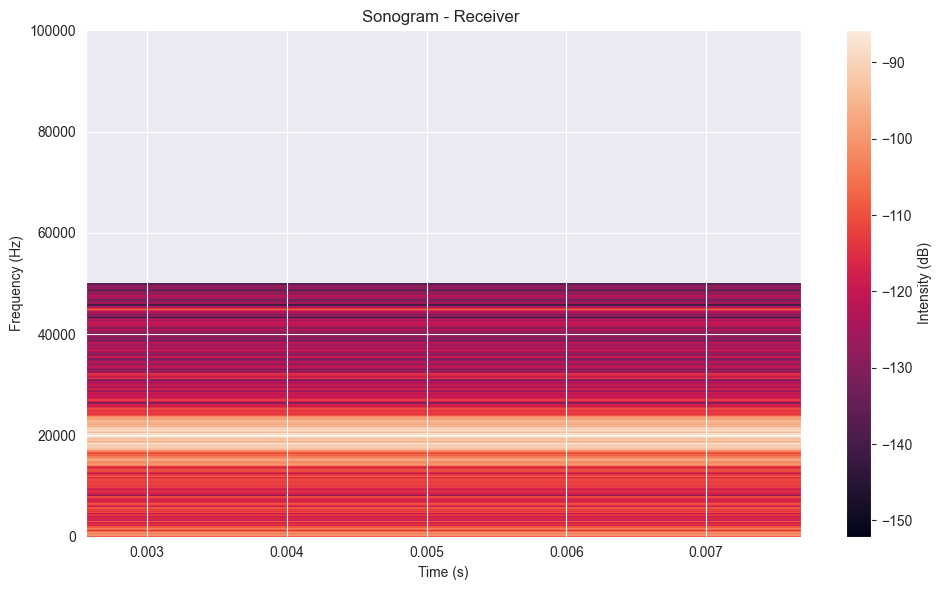

In [47]:
import matplotlib.pyplot as plt
#example plot
sample_rate = data['sys_params']['sampling_frequency']  # Sample rate (multiply in 2)
window_size = 1024  # Window size for FFT (2^10)
overlap = 512  # Overlap for FFT (2^8)
# Plot sonogram for each receiver
# sns.set_style("whitegrid")
sound_wave=data['wfm_data'][1000]
plt.figure(figsize=(10, 6))  # Adjust figsize as needed for high resolution
flattened_sound_wave = sound_wave.ravel()
plt.specgram(flattened_sound_wave, Fs=sample_rate, NFFT=window_size, noverlap=overlap)
plt.title(f'Sonogram - Receiver ')
plt.ylim(0,0.1e6)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Intensity (dB)')
plt.tight_layout()

C:\Users\meaka\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


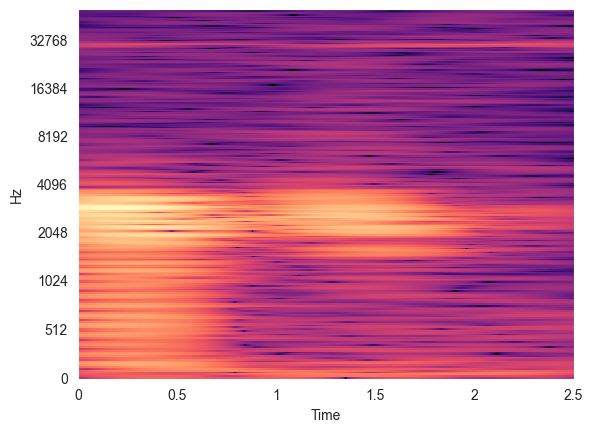

In [67]:
import librosa.display
import numpy as np
y=sound_wave
sr=sample_rate
n_fft = 512
overlap = 2
hop_length = int(librosa.time_to_samples(1./200, sr=sr))
lag = 2
n_mels = 138
fmin = 27.5
fmax = 16000.
max_size = 3
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft,
                                   hop_length=overlap,
                                   n_mels=n_mels)

S = librosa.stft(y, n_fft=n_fft, hop_length=overlap)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.power_to_db(np.abs(S)**2, ref=np.max),
                         y_axis='mel', x_axis='time', sr=sr,
                         hop_length=hop_length, ax=ax)

In [58]:
S

array([[1.26426853e-05, 1.27058673e-05, 1.27688318e-05, ...,
        1.93154723e-06, 1.91114711e-06, 1.89097200e-06],
       [1.27544849e-05, 1.28221435e-05, 1.28896421e-05, ...,
        2.43919029e-06, 2.41210436e-06, 2.38528470e-06],
       [1.85597819e-05, 1.86719190e-05, 1.87840310e-05, ...,
        5.26272912e-06, 5.20059422e-06, 5.13898394e-06],
       ...,
       [1.33727316e-06, 1.34288719e-06, 1.34850145e-06, ...,
        2.70999462e-06, 2.70042999e-06, 2.69081105e-06],
       [1.39394587e-07, 1.39977997e-07, 1.40560733e-07, ...,
        2.00712478e-07, 2.00041642e-07, 1.99367786e-07],
       [6.90905026e-08, 6.95328849e-08, 6.99763124e-08, ...,
        1.27618938e-07, 1.27067426e-07, 1.26514694e-07]])

In [30]:
data['tx_coords']

array([[ 0.        , -0.8485    ,  0.1125    ],
       [ 0.01480837, -0.84837077,  0.1125    ],
       [ 0.02961222, -0.84798312,  0.1125    ],
       ...,
       [-0.04440706, -0.84733716,  0.7075    ],
       [-0.02961222, -0.84798312,  0.7075    ],
       [-0.01480837, -0.84837077,  0.7075    ]])

In [7]:
# You can unpickle and explore system_data.pik

import pickle
import constants as c

# unpickle the system_data.pik file
with open('system_data_files/system_data_arma_5k.pik', 'rb') as f:
      system_data = pickle.load(f) # system_data is a python dictionary

# For example, access the raw waveforms using
wfms = system_data[c.WFM_DATA]

# or the soundspeed using
sound_speed = system_data[c.sound_speed]

print(system_data.keys()) # This will print all the available keys. These are defined and commented in the SASDataSchema class in the file `data_schemas.py`

AttributeError: module 'constants' has no attribute 'WFM_DATA'